### Importing the necessary libraries...

In [1]:
import pandas as pd
import numpy as np
import nltk
import spacy
import sklearn
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset..

In [ ]:
movie_revs_train = pd.read_csv("movie_reviews_dataset/Train.csv")

movie_revs_test = pd.read_csv("movie_reviews_dataset/Test.csv")

movie_revs_validate = pd.read_csv("movie_reviews_dataset/Valid.csv")

In [ ]:
movie_revs_train.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [ ]:
movie_revs_test.head()

,text,label
0,I always wrote this series off as being a comp...,0
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0
2,This movie was so poorly written and directed ...,0
3,The most interesting thing about Miryang (Secr...,1
4,"when i first read about ""berlin am meer"" i did...",0


In [ ]:
movie_revs_validate.head()

,text,label
0,It's been about 14 years since Sharon Stone aw...,0
1,someone needed to make a car payment... this i...,0
2,The Guidelines state that a comment must conta...,0
3,This movie is a muddled mish-mash of clichés f...,0
4,Before Stan Laurel became the smaller half of ...,0


checking for empty values...

In [ ]:
print("Empty values in train dataset:\n", movie_revs_train.isnull().sum(), '\n')

print("Empty values in test dataset:\n", movie_revs_test.isnull().sum(), '\n')

print("Empty values in validation dataset:\n", movie_revs_validate.isnull().sum(), '\n')

Empty values in train dataset:
 text     0
label    0
dtype: int64 

Empty values in test dataset:
 text     0
label    0
dtype: int64 

Empty values in validation dataset:
 text     0
label    0
dtype: int64 



checking number of samples for each dataset...

In [ ]:
print("Number of samples in train dataset:\n", movie_revs_train.shape[0], '\n')

print("Number of samples in test dataset:\n", movie_revs_test.shape[0], '\n')

print("Number of samples in validation dataset:\n", movie_revs_validate.shape[0], '\n')

Number of samples in train dataset:
 40000 

Number of samples in test dataset:
 5000 

Number of samples in validation dataset:
 5000 



checking label distribution...

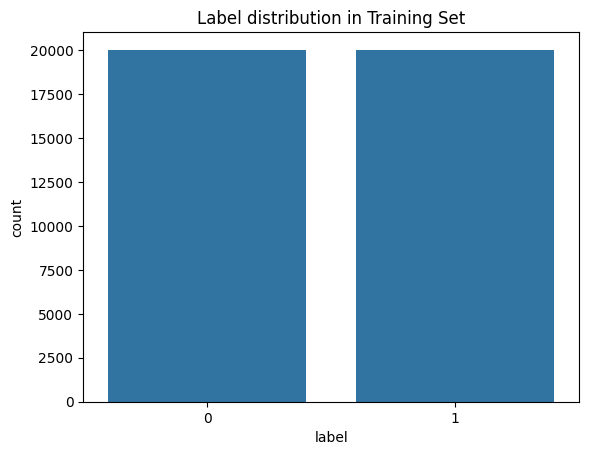

In [ ]:
sns.countplot(x = movie_revs_train['label'])
plt.title("Label distribution in Training Set")
plt.show()

checking for duplicates...

In [ ]:
dup = movie_revs_train.duplicated().sum()

print(f"Number of duplicates: {dup}")

Number of duplicates: 277


In [ ]:
movie_revs_train = movie_revs_train.drop_duplicates()

print(f"Number of duplicates after being cleaned: {movie_revs_train.duplicated().sum()}")

Number of duplicates after being cleaned: 0


checking for unnecessary characters...

In [ ]:
import re

print(movie_revs_train['text'].sample(5).values)

['I saw this film at the Rotterdam Festival, as did presumably all the other voters. The Director was present and seemed to have worked very hard and be very committed to the project, which I think explains the above average reception and mark it got. It\'s most similar to a feature length episode of Aussie kids favourite "Round the Twist" but it takes itself too seriously to have even that redeeming feature. The movie in itself is maybe worth seeing if you\'re trying to do a cinematic world tour visiting all UN member states, as I can\'t think of another Fijian movie but overall it was generic, poorly acted (albeit by an amateur cast) and prey to the subaltern mentality. The moral of the story seemed to be that native islanders will try and screw each other over, but as long as there is an essentially decent white governor to step in, all problems can be solved (by leaving the island).'
 'Okay, enough. Every time I think I\'ve seen a film that is so misbegotten, so bad in every way th

cleaning unnecessary characters...

In [ ]:
def text_cleaning_algo(inp_text):
    inp_text = re.sub(r"<.*?>", " ", inp_text)

    inp_text = re.sub(r"\s+", " ", inp_text).strip()

    return inp_text


movie_revs_train['text'] = movie_revs_train['text'].apply(text_cleaning_algo)

movie_revs_test['text'] = movie_revs_test['text'].apply(text_cleaning_algo)

movie_revs_validate['text'] = movie_revs_validate['text'].apply(text_cleaning_algo)

In [ ]:
print(movie_revs_train['text'].sample(5). values)

['After I got done watching this movie I was so upset that I had wasted 2 hours of my life. That\'s 2 hours I\'ll never get back. Ugh. When you start this you might think "Wow this is really good!" But rest assured that first impressions mean NOTHING. I was so excited about this movie until the dumbest ending I have ever seen. This movie is simply pathetic. The acting is bland, the story line is anything but original and there\'s nothing especially unique about this except that it\'s the WORST MOVIE EVER!!! DO NOT WATCH THIS MOVIE!!! WARNING!! DUMBEST MOVIE EVER YOU WILL BE SORRY IF YOU WASTE 2 HOURS OF YOUR LIFE ON THIS!!! 1/10'
 'It\'s amazing that actress P.J. Soles didn\'t become a big star after playing Riff Randall, #1 fan of the punk rock group the Ramones, in "Rock \'n\' Roll High School". Soles is so exuberant, you don\'t mind she\'s obviously too old to still be in high school (that fact is leveled out by having all the kids look 24). The movie is a fast-paced frolic that doe

Converting all text to lowercase...

In [ ]:
movie_revs_train['text'] = movie_revs_train['text'].str.lower()

movie_revs_test['text'] = movie_revs_test['text'].str.lower()

movie_revs_validate['text'] = movie_revs_validate['text'].str.lower()

Removing stopwords (words that don’t add much meaning to the text and can be removed to improve model performance)...

In [ ]:
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [ ]:
stopwords_list = set(stopwords.words('english'))

stopwords_list

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [ ]:
def stopwords_removal(inp_text):
    return " ".join([word for word in inp_text.split() if word not in stopwords_list])


movie_revs_train["text"] = movie_revs_train["text"].apply(stopwords_removal)

movie_revs_test["text"] = movie_revs_test["text"].apply(stopwords_removal)

movie_revs_validate["text"] = movie_revs_validate["text"].apply(stopwords_removal)

removing punctuation...

In [ ]:
import string
def punctuation_removal(inp_statement):
    return inp_statement.translate(str.maketrans("", "", string.punctuation))

movie_revs_train['text'] = movie_revs_train['text'].apply(punctuation_removal)

movie_revs_test['text'] = movie_revs_test['text'].apply(punctuation_removal)

movie_revs_validate['text'] = movie_revs_validate['text'].apply(punctuation_removal)

lemmatizing the words....

<i>For example, running → run, better → good</i>

In [ ]:
# import nltk
# import os

# nltk.data.path.append("C:/Users/USER/AppData/Roaming/nltk_data/corpora")  # Replace with the actual path

# # C:\Users\USER\AppData\Roaming\nltk_data\

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk


nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('punkt_tab')

lemmatization_algorithm = WordNetLemmatizer()

[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading omw-1.4: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt_tab: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [ ]:
lemmatization_algorithm = WordNetLemmatizer()

def text_lemmatization(inp_text):
    try:
        words = word_tokenize(inp_text)
        lemmatized_words = [lemmatization_algorithm.lemmatize(word) for word in words]
        return " ".join(lemmatized_words)
    except Exception as e:
        print(f"Error lemmatizing: {inp_text} - {e}")
        return inp_text  # Or return a default value like ""

movie_revs_train['text'] = movie_revs_train['text'].apply(text_lemmatization)

movie_revs_test['text'] = movie_revs_test['text'].apply(text_lemmatization)

movie_revs_validate['text'] = movie_revs_validate['text'].apply(text_lemmatization)

Vectorizing the texts...

<i>Vectorization is the process of converting text data into a numerical format while preserving its meaning</i>

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


vectorization_algorithm = TfidfVectorizer(
    max_features = 10000,
    stop_words = 'english',
    ngram_range = (1, 2)
)

# fitting and transforming the training data
x_train_vector = vectorization_algorithm.fit_transform(movie_revs_train['text'])

# transforming the test and validation data from vocabulary learned from training data

x_test_vector = vectorization_algorithm.transform(movie_revs_test['text'])

x_validate_vector = vectorization_algorithm.transform(movie_revs_validate['text'])


# assigning our target labels..

y_train = movie_revs_train['label']

y_test = movie_revs_test['label']

y_validate = movie_revs_validate['label']

We're gona use the Naive Bayes Algorithm for this project...


<i><b>Naïve Bayes</b> is great for text classification because it assumes word probabilities are independent, which works well in NLP tasks like sentiment analysis.

We'll use <strong>Multinomial Naïve Bayes</strong> (MultinomialNB from sklearn) since it's designed for text-based problems.</i>

In [ ]:
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# deploying the model...
naive_bayes_algo = MultinomialNB()

# training the model
naive_bayes_algo.fit(x_train_vector, y_train)

MultinomialNB()

Making predictions...

In [ ]:
y_prediction = naive_bayes_algo.predict(x_test_vector)

Evaluating the model...

In [ ]:
# accuracy of the model
model_accuracy = accuracy_score(y_test, y_prediction)
print(f"Model Accuracy: {model_accuracy: .4f}\n")

# Classification report (Precision, Recall, F1-Score)
print("Classification Report: \n", classification_report(y_test, y_prediction), "\n")

# Confusion Matrix
print("Confusion Matrix: \n", confusion_matrix(y_test, y_prediction))

Model Accuracy:  0.8624

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      2495
           1       0.85      0.88      0.86      2505

    accuracy                           0.86      5000
   macro avg       0.86      0.86      0.86      5000
weighted avg       0.86      0.86      0.86      5000
 

Confusion Matrix: 
 [[2116  379]
 [ 309 2196]]


### Deployment Stage

Saving the model...

In [ ]:
import joblib

# saving the trained model...
joblib.dump(naive_bayes_algo, "sentiment_analysis_model.pkl")

# saving the TF-IDF vectorizer (needed for transforming input text)

joblib.dump(vectorization_algorithm, "vectorization_algo.pkl")

print("The model and vectorizer has been saved successfully!")

The model and vectorizer has been saved successfully!
